In [1]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"


In [2]:
# Install Findspark
!pip install -q findspark

In [3]:
import findspark
findspark.init()

## creating a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Project').getOrCreate()

# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## The dataset

The data contain information on people's finanacial profiles to provide insights into credit-related information.

Data Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

The data were already split into train and test sets as CSV files.

**Objective**: I plan to use this dataset to develop a credit score classifier based on finanacial profiles.

**Potential features**: I plan to look into income, debt levels, and repayment histories type features (determined based
on EDA).

This is particularily targeted to those interested in factors influencing creditworthiness and the importance/contribution of each such factor.

**Initial hypothesis** is that income, debt levels, and repayment histories are the most important factors in
determining creditworthiness. Those with higher income, lower debt levels, and better repayment histories (i.e.,
number of delayed payments, number of credit inquiries, classified into higher credit score brackets.


### Credit score brackets


Background on credit score brackets [from Equifax](https://www.equifax.com/personal/education/credit/score/articles/-/learn/credit-score-ranges/):

- 800 to 850: Excellent
Individuals in this range are considered to be low-risk borrowers. They may have an easier time securing a loan than borrowers with lower scores.

- 740 to 799: Very good
Individuals in this range have demonstrated a history of positive credit behavior and may have an easier time being approved for additional credit.

- 670 to 739: Good
Lenders generally view those with credit scores of 670 and up as acceptable or lower-risk borrowers.

- 580 to 669: Fair
Individuals in this category are often considered “subprime” borrowers. Lenders may consider them higher-risk, and they may have trouble qualifying for new credit.

- 300 to 579: Poor
Individuals in this range often have difficulty being approved for new credit. If you find yourself in the poor category, it's likely you'll need to take steps to improve your credit scores before you can secure any new credit.


In [4]:
# Mount Google Drive as a directory
# (Requires authentication)
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# List your Google Drive contents
!ls /content/gdrive/MyDrive/Drexel/DSCI632/data

 2600-0.txt	    test.csv		   Video_Games_Sales_as_at_22_Dec_2016.csv
 alice.txt	    Titanic-Dataset.csv    wikipedia_links.csv
 alice.txt.txt	    train.csv
'Salaries(1).csv'   travel_insurance.csv


In [6]:
# NOTE: modify path
path_drive = "/content/gdrive/MyDrive"
path_user = "Drexel/DSCI632/data"

filename = "train.csv"
path_train = f"{path_drive}/{path_user}/{filename}"

filename = "test.csv"
path_test = f"{path_drive}/{path_user}/{filename}"

print(path_train)
print(path_test)

/content/gdrive/MyDrive/Drexel/DSCI632/data/train.csv
/content/gdrive/MyDrive/Drexel/DSCI632/data/test.csv


In [7]:
# read the datasets
raw_train = spark.read.csv(path_train, header=True, inferSchema=True)
raw_test = spark.read.csv(path_test, header=True, inferSchema=True)

In [8]:
# inferred schema
raw_train.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true

In [16]:
# a quick preview
raw_train.show(20)

+------+-----------+--------+---------------+----+-----------+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|    ID|Customer_ID|   Month|           Name| Age|        SSN|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|   Monthly_Balance|Credit_Score|
+------+-----------+--------+---------------+----+-----------+

Upon a quick inspection of data types and the previewed data frame, the infrSchema option didn't detect the data types correctly; or rather, there are values in some columns that would need some cleaning.

For example, age should be numeric not a string, same with monthly balance, etc.

In [14]:
print("Train data shape: ",(raw_train.count(), len(raw_train.columns)))
print("Test data shape: ",(raw_test.count(), len(raw_test.columns)))

Train data shape:  (100000, 28)
Test data shape:  (50000, 27)


In [15]:
print(f"Type: {type(raw_train)}")

Type: <class 'pyspark.sql.dataframe.DataFrame'>


## Description of All Features

- **ID**: Unique identifier for an entry.
- **Customer ID**: Unique identifier for a customer.
- **Month**: Month of the year.
- **Name**: Person's name.
- **Age**: Age.
- **SSN**: Social Security Number.
- **Occupation**: Occupation.
- **Annual Income**: Yearly earnings.
- **Monthly Inhand Salary**: Base monthly salary.
- **Num Bank Accounts**: Count of bank accounts.
- **Num Credit Card**: Count of credit cards.
- **Interest_Rate**: Interest rate applicable to credit cards.
- **Num of Loan**: Count of bank loans.
- **Type of Loan**: Varieties of loans taken.
- **Delay from due date**: Average days delayed past the payment due date.
- **Num of Delayed Payment**: Average count of delayed payments.
- **Changed Credit Limit**: Percentage change in credit card limit.
- **Num Credit Inquiries**: Count of credit card inquiries.
- **Credit Mix**: Classification of credit mix.
- **Outstanding Debt**: Remaining debt in USD.
- **Credit Utilization Ratio**: Credit card utilization ratio.
- **Credit History Age**: Duration of credit history.
- **Payment of Min Amount**: Indicator of minimum payment made.
- **Total EMI per month**: Monthly EMI payments in USD.
- **Amount invested monthly**: Monthly investment amount in USD.
- **Payment Behaviour**: Payment habits.
- **Monthly Balance**: Monthly balance in USD.
- **Credit Score**: Credit score category (Poor, Standard, Good). -- only in the train set



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Cleaning Step 1: Rename Columns

In [17]:
from pyspark.sql import DataFrame

def rename_col_names(df: DataFrame) -> DataFrame:
    new_column_names = [col_name.lower().replace(" ", "_") for col_name in df.columns]
    return df.toDF(*new_column_names)

## Cleaning Step 2: Remove Identifiers

Features such as names, SSNs, etc. are not relevant to the analysis and can be removed.

In [22]:
def drop_identifiers(df: DataFrame, columns: list) -> DataFrame:
    return df.drop(*columns)

In [25]:
raw_train2 = rename_col_names(raw_train)
raw_train2 = drop_identifiers(raw_train2, ["name", "ssn"])

raw_test2 = rename_col_names(raw_test)
raw_test2 = drop_identifiers(raw_test2, ["name", "ssn"])


In [24]:
raw_train2.show()

+------+-----------+--------+---------------+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|    id|customer_id|   month|           name| age|occupation|annual_income|monthly_inhand_salary|num_bank_accounts|num_credit_card|interest_rate|num_of_loan|        type_of_loan|delay_from_due_date|num_of_delayed_payment|changed_credit_limit|num_credit_inquiries|credit_mix|outstanding_debt|credit_utilization_ratio|  credit_history_age|payment_of_min_amount|total_emi_per_month|amount_invested_monthly|   payment_behaviour|   monthly_balance|credit_score|
+------+-----------+--------+---------------+----+----------+-------------+-----------

## EDA: check number of observations per individual

In [37]:
from pyspark.sql.functions import col, count

def get_value_counts(df, column_name):
    return df.groupBy(column_name).agg(count("*").alias("counts"))

In [38]:
# raw_train2.groupBy("customer_id").agg(count("*")).show()
get_value_counts(raw_train2, "customer_id").show()

+-----------+------+
|customer_id|counts|
+-----------+------+
| CUS_0x33d2|     8|
|  CUS_0xc65|     8|
| CUS_0x36ab|     8|
| CUS_0x7250|     8|
| CUS_0x9e13|     8|
|  CUS_0xf6c|     8|
| CUS_0x80b3|     8|
| CUS_0x42fb|     8|
| CUS_0x5479|     8|
| CUS_0x834f|     8|
| CUS_0x74f9|     8|
| CUS_0x684a|     8|
| CUS_0x63e0|     8|
| CUS_0x4e0d|     8|
| CUS_0x9f4c|     8|
| CUS_0xa980|     8|
| CUS_0x6371|     8|
| CUS_0x878c|     8|
| CUS_0xc064|     8|
| CUS_0x74c9|     8|
+-----------+------+
only showing top 20 rows



The data is longitudinal, i.e., it contains multiple observations for each individual. I will start by examining the structure of the data and the count observations for each individual.

In [40]:
get_value_counts(raw_train2, "month").show()

+--------+------+
|   month|counts|
+--------+------+
|    July| 12500|
|February| 12500|
| January| 12500|
|   March| 12500|
|     May| 12500|
|  August| 12500|
|   April| 12500|
|    June| 12500|
+--------+------+



In [41]:
get_value_counts(raw_test2, "month").show()

+---------+------+
|    month|counts|
+---------+------+
| November| 12500|
|  October| 12500|
| December| 12500|
|September| 12500|
+---------+------+



## EDA: data split and modeling notes

Given the dataset is temporally split with training data from January to August and testing data from September to December, I plan to use all 8 observations per individual within the training data and incorporate the month of observation as an explicit feature. This way the model will ackowledge the temporal patterns and potential impact when helping to assess the creditworthiness of individuals over time.

The challenges may be that the model may be more prone to overfitting with this increased granularity as well as more complex in terms of interpretation.

I plan to use a logistic regression model and a random forest models.



## EDA: categorical variables

### Occupation

In [42]:
get_value_counts(raw_train2, "occupation").show()

+-------------+------+
|   occupation|counts|
+-------------+------+
|    Scientist|  6299|
|Media_Manager|  6232|
|     Musician|  5911|
|       Lawyer|  6575|
|      Teacher|  6215|
|    Developer|  6235|
|       Writer|  5885|
|    Architect|  6355|
|     Mechanic|  6291|
| Entrepreneur|  6174|
|   Journalist|  6085|
|       Doctor|  6087|
|     Engineer|  6350|
|   Accountant|  6271|
|      Manager|  5973|
|      _______|  7062|
+-------------+------+



- **Occupation**: The occupation variable contains a category "_______" which is likely a placeholder for missing,
converting this to "Other". This may or may not contribute - out of curiosity, let's explore the distribution of this
 by credit score category.

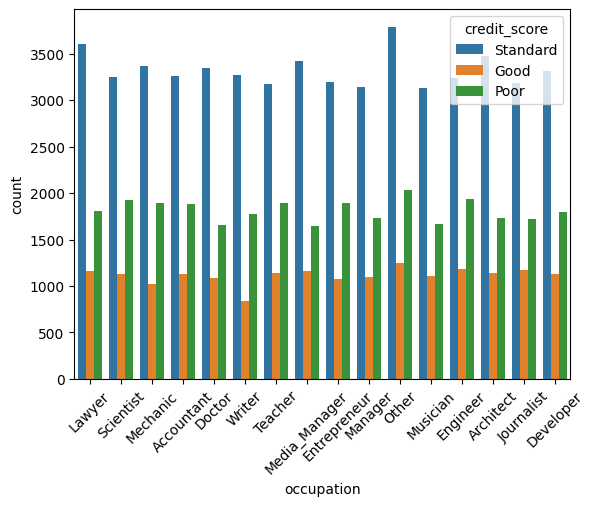

In [56]:
aggregated_df = raw_train2.groupBy('occupation', 'credit_score').count().toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="occupation",y="count", data=aggregated_df, hue="credit_score")
plt.xticks(rotation=45)
plt.show()

Credit score categories are distributed similarly across occupations. This suggests I should not include it in the
model.

## Cleaning Step 3: Occupation variable

In [43]:
from pyspark.sql.functions import when

def replace_values_based_on_condition(df, column_name, search_string, replacement_value):

    return df.withColumn(column_name, when(col(column_name).contains(search_string), replacement_value).otherwise(col(column_name)))


In [45]:
get_value_counts(replace_values_based_on_condition(raw_train2, "occupation", "_______", "Other"), "occupation").show()

+-------------+------+
|   occupation|counts|
+-------------+------+
|    Scientist|  6299|
|Media_Manager|  6232|
|     Musician|  5911|
|       Lawyer|  6575|
|      Teacher|  6215|
|    Developer|  6235|
|       Writer|  5885|
|        Other|  7062|
|    Architect|  6355|
|     Mechanic|  6291|
| Entrepreneur|  6174|
|   Journalist|  6085|
|       Doctor|  6087|
|     Engineer|  6350|
|   Accountant|  6271|
|      Manager|  5973|
+-------------+------+



In [57]:
raw_train2 = replace_values_based_on_condition(raw_train2, "occupation", "_______", "Other")
raw_test2 = replace_values_based_on_condition(raw_test2, "occupation", "_______", "Other")

## EDA: numeric variables

Features taken into account in credit score reports:

- **Age**
- **Annual Income**

- **Num Bank Accounts**
- **Num Credit Card**
- **Num of Loan**
- **Num Credit Inquiries**

- **Delay from due date**
- **Outstanding Debt**
- **Credit Utilization Ratio**
- **Total EMI per month**
- **Monthly Balance**


### Steps

- Remove Top 5% and Bottom 5% of the outliers
- Additionally remove underscores that make it a string datatype

In [211]:
# set some variables
COUNT_VARS = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'num_credit_inquiries']
CONTINUOUS_VARS = ['age', 'annual_income', 'delay_from_due_date', 'outstanding_debt',
                        'credit_utilization_ratio', 'total_emi_per_month', 'monthly_balance']
CAT_VAR = ["month"]
INDEPENDENT_VARS = CONTINUOUS_VARS + COUNT_VARS + CAT_VAR

TARGET_VAR = "credit_score"
ID_VAR = "id"

## Cleaning Step 4: removing underscores from numeric variable values

In [58]:
from pyspark.sql.functions import regexp_replace

def clean_and_convert_to_numeric(df: DataFrame, independent_vars: list) -> DataFrame:
    for var in independent_vars:
        df = df.withColumn(var, regexp_replace(col(var), "_", "").cast("float"))
    return df

In [61]:
raw_train2 = clean_and_convert_to_numeric(raw_train2, INDEPENDENT_VARS)
raw_test2 = clean_and_convert_to_numeric(raw_test2, INDEPENDENT_VARS)

## Cleaning Step 5: removing extreme values

In [67]:
from pyspark.sql.window import Window
from pyspark.sql.functions import percent_rank

def remove_outliers_spark(df: DataFrame, variable: str) -> DataFrame:
    # compute percent rank for each row within the partition
    df = df.withColumn("percent_rank", percent_rank().over(Window.orderBy(col(variable))))

    # get rows between the 5th and 95th percentiles
    df_filtered = df.filter((col("percent_rank") > 0.05) & (col("percent_rank") < 0.95))

    # drop "percent_rank" column
    df_filtered = df_filtered.drop("percent_rank")

    return df_filtered

In [212]:
train_df = raw_train2
test_df = raw_test2

for var in INDEPENDENT_VARS:
    train_df = remove_outliers_spark(train_df, var)

for var in INDEPENDENT_VARS:
    test_df = remove_outliers_spark(test_df, var)


## Cleaning Step 6: select needed variables for analysis

In [213]:
train_df = train_df.select([ID_VAR, TARGET_VAR]+INDEPENDENT_VARS)
test_df = test_df.select([ID_VAR]+INDEPENDENT_VARS)

## Cleaning Step 7: missing values

In [214]:
def df_info(df: DataFrame, columns: list):
    df_selected = df.select(columns)

    print(f"Total rows: {df_selected.count()}\n")

    for column in df_selected.columns:
        # data type for each column
        dtype = [dtype for name, dtype in df_selected.dtypes if name == column][0]

        # count non-null values in each column
        non_null_count = df_selected.filter(df_selected[column].isNotNull()).count()

        print(f"Column: {column}")
        print(f"Non-Null Count: {non_null_count} DataType: {dtype}\n")


In [215]:
df_info(train_df, train_df.columns)

Total rows: 21050

Column: id
Non-Null Count: 21050 DataType: string

Column: credit_score
Non-Null Count: 21050 DataType: string

Column: age
Non-Null Count: 21050 DataType: float

Column: annual_income
Non-Null Count: 21050 DataType: float

Column: delay_from_due_date
Non-Null Count: 21050 DataType: float

Column: outstanding_debt
Non-Null Count: 21050 DataType: float

Column: credit_utilization_ratio
Non-Null Count: 21050 DataType: float

Column: total_emi_per_month
Non-Null Count: 21050 DataType: float

Column: monthly_balance
Non-Null Count: 21050 DataType: float

Column: num_bank_accounts
Non-Null Count: 21050 DataType: float

Column: num_credit_card
Non-Null Count: 21050 DataType: float

Column: num_of_loan
Non-Null Count: 21050 DataType: float

Column: num_credit_inquiries
Non-Null Count: 21050 DataType: float

Column: month
Non-Null Count: 21050 DataType: string



In [216]:
print("Final Train data shape: ",(train_df.count(), len(train_df.columns)))
print("Final Test data shape: ",(test_df.count(), len(test_df.columns)))

Final Train data shape:  (21050, 14)
Final Test data shape:  (8934, 13)


In [217]:
# checking if that are any missing values
print(train_df.dropna(how="any").count() == train_df.count())
print(test_df.dropna(how="any").count() == test_df.count())

True
True


## EDA: independent variable distributions

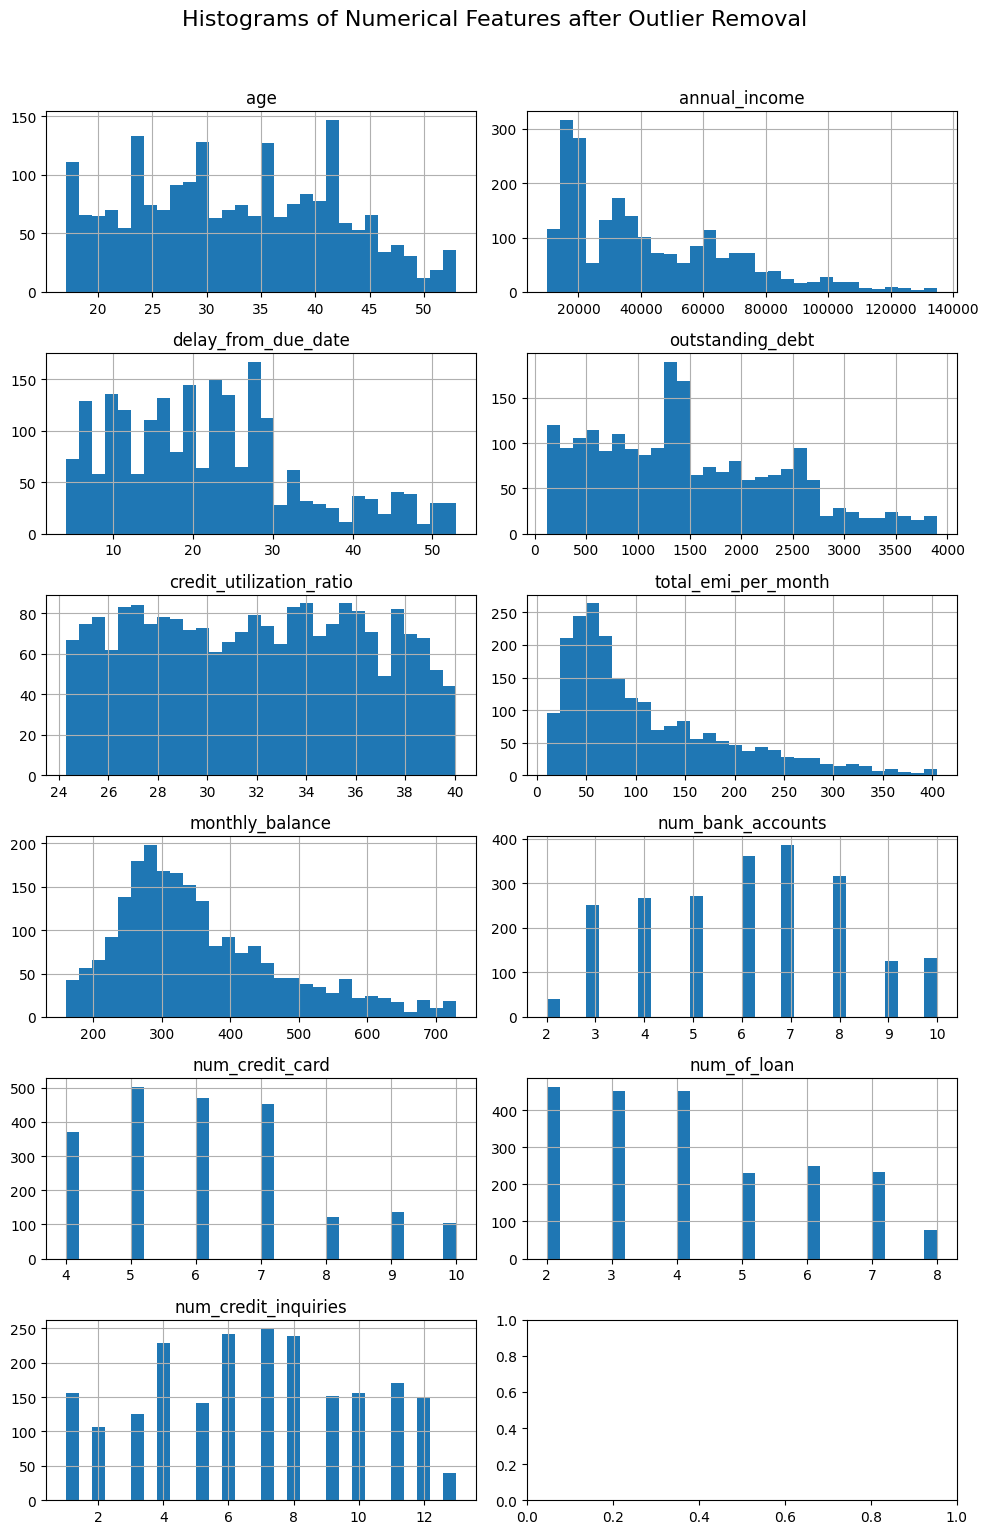

In [219]:
# consideration for large data
sampled_df = train_df.sample(fraction=0.1).toPandas()

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for i, feature in enumerate(INDEPENDENT_VARS[:-1]):
    if i < len(axes):
        sampled_df[feature].hist(ax=axes[i], bins=30)
        axes[i].set_title(feature)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

fig.suptitle('Histograms of Numerical Features after Outlier Removal', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## EDA: target variable distribution

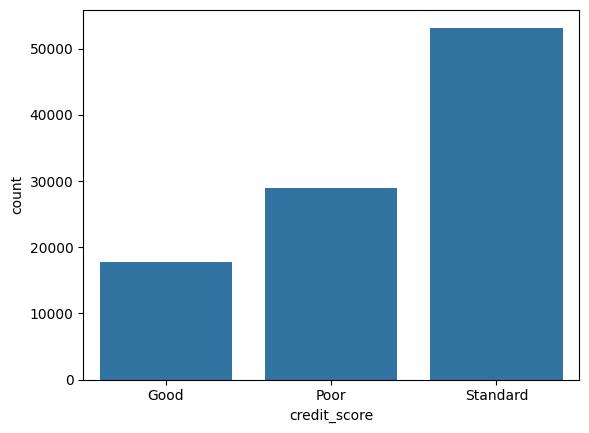

In [220]:
aggregated_df2 = raw_train2.groupBy('credit_score').count().toPandas()

sns.barplot(x="credit_score",y="count", data=aggregated_df2)
plt.show()

The class distribution is imbalanced, with a higher number of individuals in the "Standard" credit score category. This is important to note as the model may perform worse on the minority classes. Under-sampling the majority class may be an approach to consider in the future.

## EDA: independent variable distributions by target variable

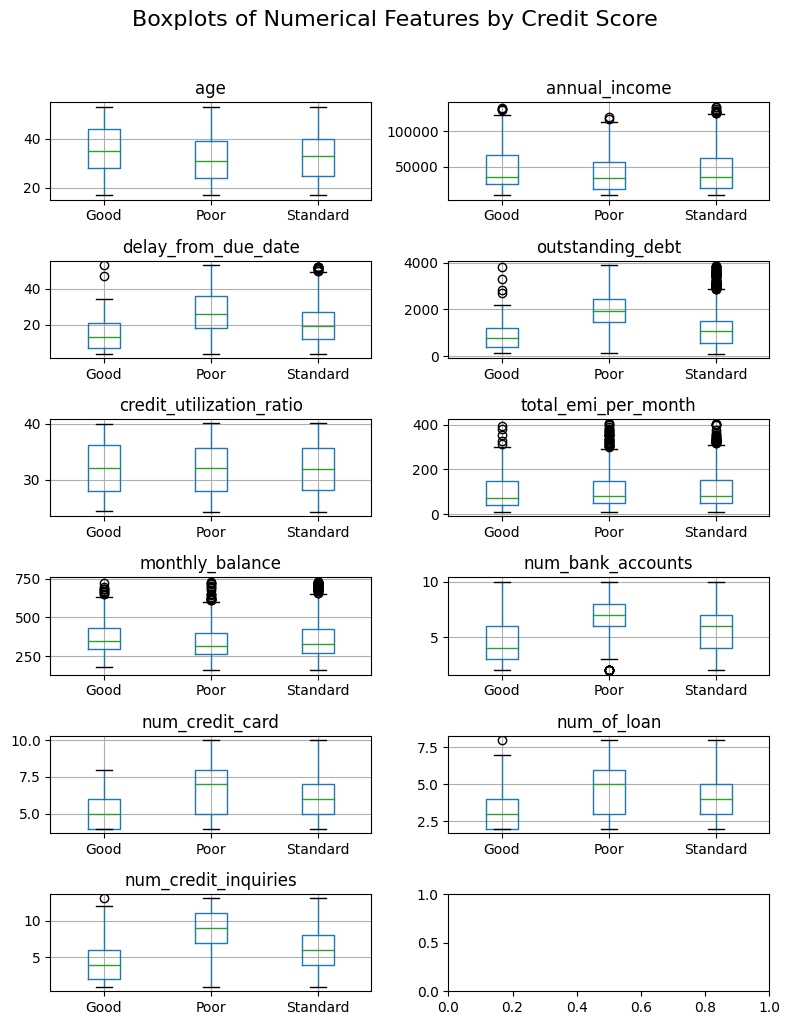

In [221]:
# plot the distribution of the independent variables by target vairable
fig, axes = plt.subplots(6, 2, figsize=(8, 10))
axes = axes.flatten()

for i, feature in enumerate(INDEPENDENT_VARS[:-1]):
    sampled_df.boxplot(column=feature, by='credit_score', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.suptitle('Boxplots of Numerical Features by Credit Score', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

These distributions tell us that there are some differences between median values of each independent feature between the 3 credit score classes. However, they may not be significant as the spread of the data is quite large within each class.

But for the sake of some insight, it looks like the Poor credit score was likley amogntst slighly younger indidivudals than the Good credit score.

Or the higher numbers of loans, credit cards, bank accounts, inquiries, and outstanding debt seem to align with the hypothesis so far that such individuals are likely to have a poor credit score.

Credit utilization ratio didn't have much difference, which is interesting because my credit score decreases right away as soon I go above 30%...

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables


## Variable transformations

Based ont the boxplots, there are still some outliers in for example monthly balance and total EMI per month, outstanding debt, and annual income. But they are not as extreme as the top and bottom 5% of the distribution.

Standardizing the variables around the mean and scaling to unit variance is important for models that depend on distance metrics or assume features to be on the same scale.

Even though tree based models are not sensitive to the scale of the features, since I plan to use logistic regression as a benchmark, I will perform these transformations and keep that data for the tree-based models as well (this is the case as the regularizaiton in logistic regression, such as lasso or ridge, is sensitive to the scale of the features). Moreover, the same scale also speeds up the model convergance.


In [226]:
train_df.columns

['id',
 'credit_score',
 'age',
 'annual_income',
 'delay_from_due_date',
 'outstanding_debt',
 'credit_utilization_ratio',
 'total_emi_per_month',
 'monthly_balance',
 'num_bank_accounts',
 'num_credit_card',
 'num_of_loan',
 'num_credit_inquiries',
 'month']

## Transformation Pipeline

In [229]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, OneHotEncoder, StringIndexer

def create_pipeline(features, label="credit_score", month_col="month", transform_label=True):
  stages = []
  stages.append(StringIndexer(inputCol=month_col, outputCol=month_col + "_indexed"))
  stages.append(OneHotEncoder(inputCols=[month_col + "_indexed"], outputCols=[month_col + "_vec"]))
  # update month col if passed
  features = [f if f != month_col else month_col + "_vec" for f in features]


  # Step 1: VectorAssembler to transform feature columns into a single features vector
  stages.append(VectorAssembler(inputCols=features, outputCol="features_unscaled"))

  # Step 2: Standardize the features
  stages.append(StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True))

  if transform_label:
    # Step 3: Index the target variable
    stages.append(StringIndexer(inputCol=label, outputCol="label_indexed"))
    stages.append(OneHotEncoder(inputCols=["label_indexed"], outputCols=["label"]))

  return stages

# Step 5: Define the pipeline
stages = create_pipeline(INDEPENDENT_VARS[:-1])
pipeline = Pipeline(stages=stages)
train_df_transformed = pipeline.fit(train_df).transform(train_df)

In [230]:
train_df_transformed.show(10)

+-------+------------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+------+-------------+-------------+--------------------+--------------------+-------------+-------------+
|     id|credit_score| age|annual_income|delay_from_due_date|outstanding_debt|credit_utilization_ratio|total_emi_per_month|monthly_balance|num_bank_accounts|num_credit_card|num_of_loan|num_credit_inquiries| month|month_indexed|    month_vec|   features_unscaled|            features|label_indexed|        label|
+-------+------------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+------+-------------+-------------+--------------------+--------------------+-------------+-------------+
|0x12f3d|        Good|42.0|     17908.01|               10.0|   

Since the test dataset does not have labels, I will use it as the final evaluation set. I can't test the performance on the unseen data otherwise, so I'm splitting the train_df_transformed into a train and valid datasets (80/20)

In [231]:
train, valid = train_df_transformed.randomSplit([0.8, 0.2], seed=42)

In [232]:
print(f"Train no. records: {train.count():,}")
print(f"Validation no. records: {valid.count():,}")

Train no. records: 16,891
Validation no. records: 4,159


# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results




## Logistic Regression

elasticNetParam: determines the mix between L1 and L2 regularization. Elastic Net regularization combines the properties of both L1 (Lasso) and L2 (Ridge) regularization.

In [233]:
from pyspark.ml.classification import LogisticRegression

# train
log_reg = LogisticRegression(featuresCol="features", labelCol="label_indexed", elasticNetParam=0.2)
log_reg_model = log_reg.fit(train)

In [234]:
# predict on train set
preds_train = log_reg_model.transform(train)

In [235]:
# predict on valid set
preds_valid = log_reg_model.transform(valid)

# predict on evaluataiton (test) set
stages = create_pipeline(INDEPENDENT_VARS, transform_label=False)
pipeline = Pipeline(stages=stages)
eval_df_transformed = pipeline.fit(test_df).transform(test_df)

preds_test = log_reg_model.transform(eval_df_transformed) # later can pull a few random predictions to evaluate

In [236]:
get_value_counts(preds_valid, "prediction").show()

+----------+------+
|prediction|counts|
+----------+------+
|       1.0|  1323|
|       0.0|  2826|
|       2.0|    10|
+----------+------+



### Evaluate

In [237]:
from pyspark.mllib.evaluation import MulticlassMetrics

preds_train_rdd = preds_train.select("prediction", "label_indexed").rdd.map(tuple)
preds_valid_rdd = preds_valid.select("prediction", "label_indexed").rdd.map(tuple)

metrics_train = MulticlassMetrics(preds_train_rdd)
metrics_valid = MulticlassMetrics(preds_valid_rdd)


/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [238]:
print(f"Train Accuracy: {round(metrics_train.accuracy*100, 2)}%")
print(f"Validation Accuracy: {round(metrics_valid.accuracy*100, 2)}%")

Train Accuracy: 66.72%
Validation Accuracy: 66.24%


In [239]:
coefficients = log_reg_model.coefficientMatrix.toArray()

In [240]:
coefficients.shape # 3 classes, 11 features

(3, 11)

In [241]:
import numpy as np
odds_ratios = np.exp(coefficients)

In [247]:
INDEPENDENT_VARS2 = INDEPENDENT_VARS
INDEPENDENT_VARS2[-1] = "month_vec"

#### Figure 1. Feature Interpreation/Contribution

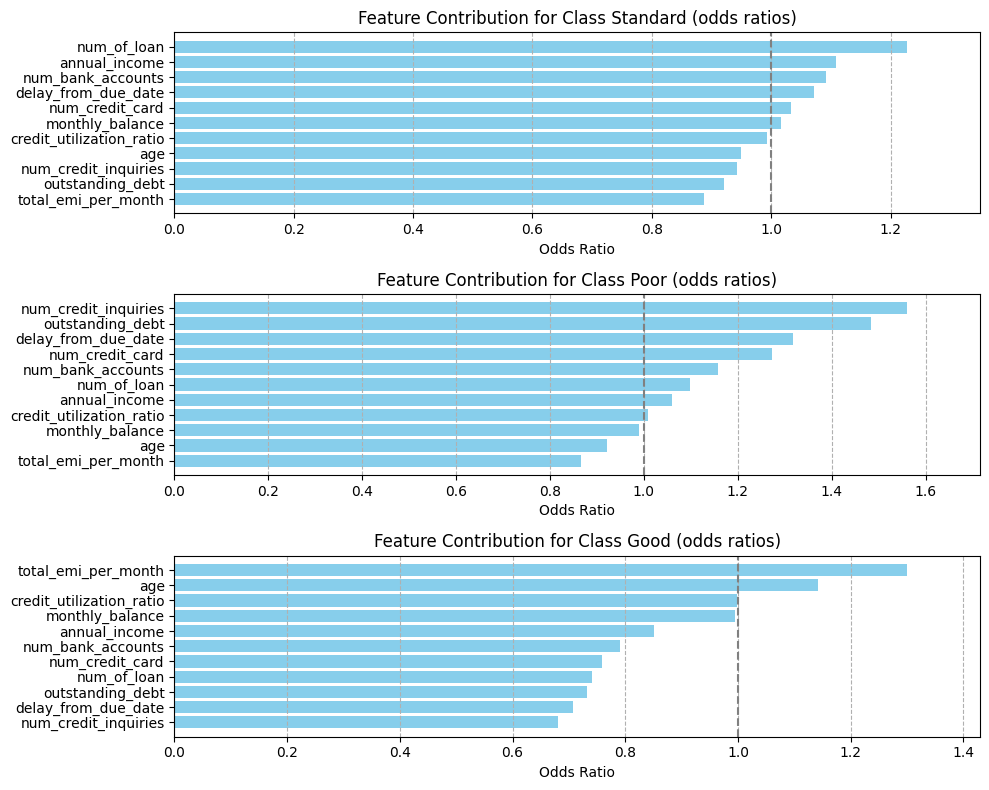

In [248]:
import matplotlib.pyplot as plt
import numpy as np

n_classes = 3
class_labels = ["Standard", "Poor", "Good"]
n_features = len(INDEPENDENT_VARS2)

# Setup the figure and axes
fig, axs = plt.subplots(n_classes, 1, figsize=(10, 8))

for i, c in zip(range(n_classes), class_labels):

    odds_ratios_for_class = odds_ratios[i]
    sorted_indices = np.argsort(odds_ratios_for_class)
    sorted_features = np.array(INDEPENDENT_VARS2)[sorted_indices]
    sorted_odds_ratios = odds_ratios_for_class[sorted_indices]


    axs[i].barh(sorted_features, sorted_odds_ratios, color='skyblue')
    axs[i].set_xlabel('Odds Ratio')
    axs[i].set_title(f'Feature Contribution for Class {c} (odds ratios)')
    axs[i].axvline(x=1, color='gray', linestyle='--')
    axs[i].set_xlim(0, max(np.max(odds_ratios_for_class)*1.1, 1.1))
    axs[i].grid(True, which="both", ls="--", axis='x')

plt.tight_layout()
plt.show()


In [203]:
sorted_odds_ratios # for the Good Score class

array([0.67598431, 0.73274682, 0.7344618 , 0.73509185, 0.77682222,
       0.77690352, 0.85228687, 0.99863587, 0.99954212, 1.11400976,
       1.29379855])

Results and Discussion

Accuracy of about 66-67%: this correctly predicts the credit score class (good, standard, or poor) for about two-thirds of the individuals in both the training and validation datasets. This means that, on average, for every 100 predictions made, about 66 to 67 of them correctly identify an individual's credit score class.

For the Good Credit score, the features that contribute the most to "achieveing" the good credit score are Total EMI per month and Age (panel 3 in Figure 1):
- where for individuals with one unit increase in Total EMI per month, they are about 30% (1.3 odds ratio) more likely to have a good credit score
- similarily, older individuals are about 11% more liekly to have a Good credit score category

The opposite holds for number of credit inquires, number of bank loans, outstanding debt, average days delayed past the payment due date, number of credit cards, and number of bank acounts, where with each unit increase in each of these financial profile characteristic, the individuals are at least 22% (1-0.78) or more less likely to have a good credit score category.

The model seems to make sense as it is a flipped scenario for the poor credit score class in panel 2 of Figure 1.

For the standard credit score class, the number of bank loans and annual income seem to be most important.

*Anual income also did not seem to follow a pattern as for the poor class, the increase in annual income corresponded to a higher likelihood of having a poor credit score category. It may be just that the credit utilization factors are more outweigh this piece, which makes sense in real world. THe credit utlization ratio holds (as frmo the EDA boxplots) without any big effect on the credit score classification.

Some of the limitations in this interpretation are the units. Since the data was scaled, I would need to transform it back to the original scale



In [146]:
preds_test.createOrReplaceTempView("eval_predictions_view")

random_predictions = spark.sql("select * from eval_predictions_view order by rand() limit 5")

In [147]:
random_predictions.show()

+-------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|     id| age|annual_income|delay_from_due_date|outstanding_debt|credit_utilization_ratio|total_emi_per_month|monthly_balance|num_bank_accounts|num_credit_card|num_of_loan|num_credit_inquiries|   features_unscaled|            features|       rawPrediction|         probability|prediction|
+-------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|0x14944|30.0|     62237.13|               20.0|         2547.59|               24.420616|          208.92934|      343.56854|       

In these 5 cases, the rows 3,4 classified these individuals into the poor credit score category. This makes sense as they do have a larger amount of bank accounts, credit cards, and the highest avg number of days with delayed payements.

The delayed payments seem to stand out the most when comparing to other 3 individuals that landed in the "standard" credit score category.



## Limitations

The model could be further improved with undergoing a parameter tunning process. For the next steps, I could explore a tree-based model such as a random forest.

In [249]:
from pyspark.ml.classification import RandomForestClassifier

# train
rf = RandomForestClassifier(featuresCol="features", labelCol="label_indexed")
rf_model = rf.fit(train)


In [250]:
# predict on train set
preds_train = rf_model.transform(train)

In [251]:
# predict on valid set
preds_valid = rf_model.transform(valid)

# predict on evaluataiton (test) set
stages = create_pipeline(INDEPENDENT_VARS[:-1], transform_label=False)
pipeline = Pipeline(stages=stages)
eval_df_transformed = pipeline.fit(test_df).transform(test_df)

preds_test = rf_model.transform(eval_df_transformed) # later can pull a few random predictions to evaluate

In [252]:
from pyspark.mllib.evaluation import MulticlassMetrics

preds_train_rdd = preds_train.select("prediction", "label_indexed").rdd.map(tuple)
preds_valid_rdd = preds_valid.select("prediction", "label_indexed").rdd.map(tuple)

metrics_train = MulticlassMetrics(preds_train_rdd)
metrics_valid = MulticlassMetrics(preds_valid_rdd)


/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [253]:
print(f"Train Accuracy: {round(metrics_train.accuracy*100, 2)}%")
print(f"Validation Accuracy: {round(metrics_valid.accuracy*100, 2)}%")

Train Accuracy: 70.98%
Validation Accuracy: 70.67%


In [254]:
# Get feature importances
importances = rf_model.featureImportances

# Convert feature importances to a Python list (for easier handling)
importances_list = importances.toArray().tolist()

# Pair feature names with their importances
feature_importance_pairs = zip(INDEPENDENT_VARS, importances_list)

# Sort the features by importance
sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Display the sorted features and their importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: outstanding_debt, Importance: 0.573167604604719
Feature: num_credit_inquiries, Importance: 0.13253535477841857
Feature: num_credit_card, Importance: 0.11549762558809669
Feature: delay_from_due_date, Importance: 0.10282671388225813
Feature: num_bank_accounts, Importance: 0.03779462280582876
Feature: num_of_loan, Importance: 0.011410819373253054
Feature: annual_income, Importance: 0.008516032986114733
Feature: age, Importance: 0.008177916993194163
Feature: total_emi_per_month, Importance: 0.006601134902510143
Feature: credit_utilization_ratio, Importance: 0.0019471128766369865
Feature: monthly_balance, Importance: 0.0015250612089697628


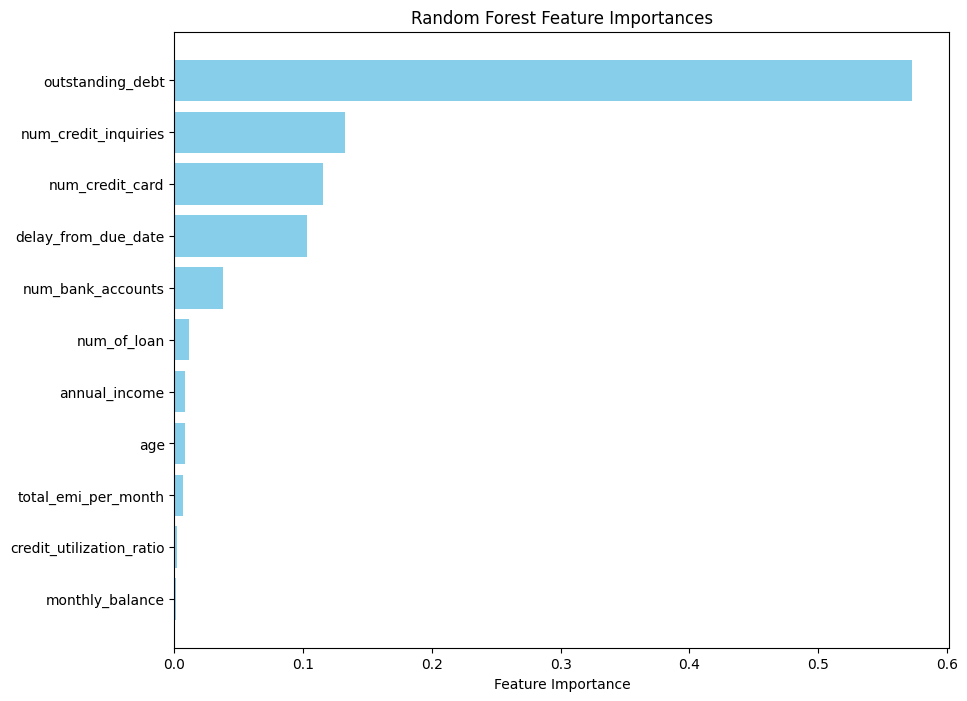

In [255]:
features, importances = zip(*sorted_features)

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The performance of the random forest was slightly higher - ~70%. The feature contribution showed similar important feature to the credit score category classification with the exception ot age and total EMI per month. What was suprising was how much more important was the outstanding debt feature in this model.

Quickly glancing at 5 random predictions in the evaluation set, 1st, 4th, and 5th row have a very high outstanding debt compared to 2nd and 3rd, and they were classified as having a poor credit score category.

In [256]:
preds_test.createOrReplaceTempView("eval_predictions_view2")

random_predictions = spark.sql("select * from eval_predictions_view2 order by rand() limit 5")

In [257]:
random_predictions.show()

+-------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+---------+-------------+-------------+--------------------+--------------------+--------------------+--------------------+----------+
|     id| age|annual_income|delay_from_due_date|outstanding_debt|credit_utilization_ratio|total_emi_per_month|monthly_balance|num_bank_accounts|num_credit_card|num_of_loan|num_credit_inquiries|    month|month_indexed|    month_vec|   features_unscaled|            features|       rawPrediction|         probability|prediction|
+-------+----+-------------+-------------------+----------------+------------------------+-------------------+---------------+-----------------+---------------+-----------+--------------------+---------+-------------+-------------+--------------------+--------------------+--------------------+--------------------+----------+
| 0x7e88|39.0|     